Path found: [<POINT (2 2)>, <POINT (20 5)>, <POINT (35 30)>, <POINT (60 80)>, <POINT (98 98)>]


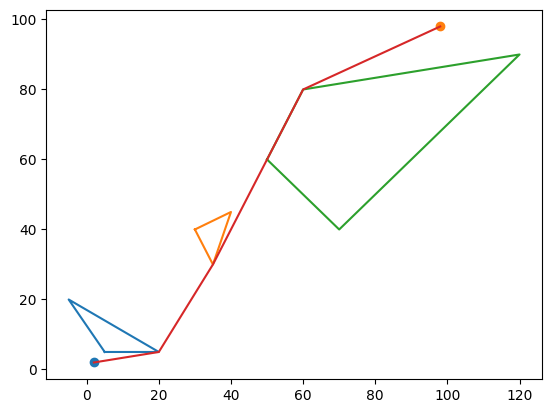

In [251]:
import networkx as nx
from shapely.geometry import Polygon, Point, LineString
import numpy as np
import heapq

from dataclasses import dataclass, field, astuple
from typing import List


@dataclass(order=True)
class Node:
    cost: int
    current: Point = field(compare=False)
    path: List[Point] = field(compare=False)

    def __iter__(self):
        return iter(astuple(self))

# Environment definition
# polygons = [
#     Polygon([(5, 5), (20, 5), (-5, 20)]),
#     Polygon([(-10, 40), (40, 45), (35, 30)]),
#     Polygon([(50, 60), (70, 40), (80, 90), (60, 80)]),
# ]


polygons = [
    Polygon([(5, 5), (20, 5), (-5, 20)]),
    Polygon([(30, 40), (40, 45), (35, 30)]),
    Polygon([(50, 60), (70, 40), (120, 90), (60, 80)]),
]

start = Point(2, 2)
goal = Point(98, 98)

# Helper functions


def line_of_sight(p1, p2, polygons):
    line = LineString([p1, p2])
    for polygon in polygons:
        if line.crosses(polygon) or polygon.contains(line):
            return False
    return True


def _dijkstra(graph, start, goal):
    pq = [(0, start, [])]
    visited = set()

    while pq:
        print(pq)
        (cost, current, path) = heapq.heappop(pq)
        if current in visited:
            continue

        visited.add(current)
        path = path + [current]

        if current == goal:
            return path
        for neighbor in graph[current]:
            if neighbor not in visited:
                heapq.heappush(
                    pq, (cost + graph[current][neighbor]["weight"], neighbor, path))

    return None


def dijkstra(graph, start, goal):
    pq = [Node(0, start, [])]
    visited = set()

    while pq:
        (cost, current, path) = heapq.heappop(pq)
        if current in visited:
            continue
        visited.add(current)
        path = path + [current]

        if current == goal:
            return path
        for neighbor in graph[current]:
            if neighbor not in visited:
                heapq.heappush(
                    pq, Node(cost + graph[current][neighbor]["weight"], neighbor, path))

    return None


# Create a visibility graph
graph = nx.Graph()

vertices = [start, goal] + \
    [v for polygon in polygons for v in polygon.exterior.coords[:-1]]

n = len(vertices)
for i, v1 in enumerate(vertices[:-1]):
    for v2 in vertices[i + 1:]:
        p1, p2 = Point(v1), Point(v2)
        if p1 != p2 and line_of_sight(p1, p2, polygons):
            graph.add_edge(p1, p2, weight=p1.distance(p2))

path = dijkstra(graph, start, goal)
if path:
    print("Path found:", path)

    plt.scatter(*start.xy)
    plt.scatter(*goal.xy)

    for polygon in polygons:
        plt.plot(*polygon.exterior.xy)

    xs = [point.x for point in path]
    ys = [point.y for point in path]
    plt.plot(xs, ys)
else:
    print("No path found")
